# Project Overview

In this project, we're going to download and analyze the data on RNA sequences of COVID in two of its major variants: Delta and Omicron. RNA is a nucleic acid present in any living cell that has one strand consisting of various combinations of four nucleotides: uracil, cytosine, adenine, and guanine. RNA is the "source code" for COVID that enables the virus to enter the cell and replicate itself.



We'll be using the available data from NIH (National Institutes of Health), the federal government agency in the U.S. You can download the dataset containing the metadata for each COVID RNA sequence from [this link](https://drive.google.com/file/d/1S2ZDjdRkY78kZxBtc9YNUh0mByTHXQ23/view) and look at its documentation [here](https://www.ncbi.nlm.nih.gov/datasets/docs/v1/data-packages/sars-cov-2-genome/).

## 1 Step) Loading the Metadata

Before downloading the actual COVID RNA sequences and analyzing them, let's first download and quickly explore the metadata containing the unique identifiers and other info about each of the existing COVID RNA sequences.



In [2]:
import pandas as pd 

# Load the metadata
metadata = pd.read_csv('ncbi_datasets.csv')

C:\Users\Hassan\AppData\Local\Temp\ipykernel_31028\632854090.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('ncbi_datasets.csv')


In [3]:
# Print the first few rows of the metadata
metadata.head()

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12,PRJNA485481,NaN
1,OM487257.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-220129247957/2021,29815,GenBank,complete,North America; USA,NaN,NaN,9606,2021-12-23,PRJNA614995,SAMN25559487
2,OM403304.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/VM20001061-2/2020,29870,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
3,OM403303.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/Original/2020,29851,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
4,OM401120.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-211112790633/2021,29712,GenBank,complete,North America; USA,NaN,NaN,9606,2021-09-25,PRJNA614995,SAMN23427251


In [4]:
# Print the shape of the metadata
metadata.shape

(847791, 16)

In [5]:
# Print the data types of the different columns of the metadata
metadata.dtypes

Nucleotide Accession     object
Species Taxonomy Id       int64
Species Name             object
Virus Genus              object
Virus Family             object
Isolate Name             object
Nucleotide Length         int64
Sequence Type            object
Nuc Completeness         object
Geo Location             object
US State                float64
Host Name               float64
Host Taxonomy ID          int64
Collection Date          object
BioProject               object
BioSample                object
dtype: object

In [6]:
# Convert dates to the appropriate data type.
metadata['Collection Date'] = pd.to_datetime(metadata['Collection Date'], format='mixed')

In [7]:
# Print the data types of the different columns of the metadata
metadata.dtypes

Nucleotide Accession            object
Species Taxonomy Id              int64
Species Name                    object
Virus Genus                     object
Virus Family                    object
Isolate Name                    object
Nucleotide Length                int64
Sequence Type                   object
Nuc Completeness                object
Geo Location                    object
US State                       float64
Host Name                      float64
Host Taxonomy ID                 int64
Collection Date         datetime64[ns]
BioProject                      object
BioSample                       object
dtype: object

In [8]:
# replace the space in the column names with an underscore 
metadata.columns = metadata.columns.str.replace(' ', '_')
metadata.columns

Index(['Nucleotide_Accession', 'Species_Taxonomy_Id', 'Species_Name',
       'Virus_Genus', 'Virus_Family', 'Isolate_Name', 'Nucleotide_Length',
       'Sequence_Type', 'Nuc_Completeness', 'Geo_Location', 'US_State',
       'Host_Name', 'Host_Taxonomy_ID', 'Collection_Date', 'BioProject',
       'BioSample'],
      dtype='object')

In [9]:
metadata

,Nucleotide_Accession,Species_Taxonomy_Id,Species_Name,Virus_Genus,Virus_Family,Isolate_Name,Nucleotide_Length,Sequence_Type,Nuc_Completeness,Geo_Location,US_State,Host_Name,Host_Taxonomy_ID,Collection_Date,BioProject,BioSample
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN
1,OM487257.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-220129247957/2021,29815,GenBank,complete,North America; USA,NaN,NaN,9606,2021-12-23,PRJNA614995,SAMN25559487
2,OM403304.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/VM20001061-2/2020,29870,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
3,OM403303.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/Original/2020,29851,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
4,OM401120.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-211112790633/2021,29712,GenBank,complete,North America; USA,NaN,NaN,9606,2021-09-25,PRJNA614995,SAMN23427251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847786,HG996822.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,a925,29903,GenBank,complete,Europe; United Kingdom:Oxford,NaN,NaN,9606,2020-11-27,PRJEB43319,SAMEA8246553
847787,HG996820.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,a935,29903,GenBank,complete,Europe; United Kingdom:Oxford,NaN,NaN,9606,2020-12-10,PRJEB43319,SAMEA8246563
847788,HG996813.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,a929,29903,GenBank,complete,Europe; United Kingdom:Oxford,NaN,NaN,9606,2020-12-01,PRJEB43319,SAMEA8246557
847789,HG996715.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,a850,29897,GenBank,complete,Europe; United Kingdom:Oxford,NaN,NaN,9606,2020-11-29,PRJEB43319,SAMEA8246478


## 2 Step) Exploratory Data Analysis

Let's analyze the metadata to possibly discover some interesting insights.


1) When was the first COVID RNA sequence collected on each continent?

In [10]:
# Create a new column "contient" column from the "geo_location" column 
metadata['Continent'] = [str(loc).split(";")[0] for loc in metadata['Geo_Location']]
metadata['Continent']

0                  Asia
1         North America
2                  Asia
3                  Asia
4         North America
              ...      
847786           Europe
847787           Europe
847788           Europe
847789           Europe
847790           Europe
Name: Continent, Length: 847791, dtype: object

In [11]:
metadata.groupby('Continent').apply(lambda x: x.sort_values('Collection_Date').iloc[0])

C:\Users\Hassan\AppData\Local\Temp\ipykernel_31028\2396231706.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metadata.groupby('Continent').apply(lambda x: x.sort_values('Collection_Date').iloc[0])


,Nucleotide_Accession,Species_Taxonomy_Id,Species_Name,Virus_Genus,Virus_Family,Isolate_Name,Nucleotide_Length,Sequence_Type,Nuc_Completeness,Geo_Location,US_State,Host_Name,Host_Taxonomy_ID,Collection_Date,BioProject,BioSample,Continent
Continent,,,,,,,,,,,,,,,,,
Africa,OL336607.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/MLI/M00960/2020,29890,GenBank,complete,Africa; Mali,NaN,NaN,9606,2020-02-06,NaN,NaN,Africa
Asia,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia
Europe,OU393175.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,NaN,29890,GenBank,complete,Europe; United Kingdom:England,NaN,NaN,9606,2020-01-01,PRJEB37886,SAMEA9354774,Europe
North America,OL467832.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/hCoV_19_USA_ID_IVREF_6520...,29831,GenBank,complete,"North America; USA: Bingham, ID",NaN,NaN,9606,2020-01-01,NaN,NaN,North America
Oceania,MW320919.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/AUS/VIC16874/2020,29790,GenBank,complete,Oceania; Australia: Victoria,NaN,NaN,9606,2020-01-01,NaN,SAMN16975285,Oceania
South America,MZ477858.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/BRA/PR-HF441/2020,29779,GenBank,complete,South America; Brazil: Parana,NaN,NaN,9606,2020-01-01,NaN,NaN,South America
nan,MT318828.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/ZJNB016/2020,29828,GenBank,complete,NaN,NaN,NaN,9606,2020-01-20,NaN,NaN,nan


2) How many sequences were collected on each continent?



In [12]:
metadata["Continent"].value_counts()

Continent
North America    571069
Europe           254520
Oceania           10603
Asia               8581
Africa             2192
South America       755
nan                  71
Name: count, dtype: int64

3) How long are the shortest and longest sequences? Look at the outliers, if any, to estimate their representation.



In [13]:
short_seq = metadata["Nucleotide_Length"].min()
long_seq = metadata["Nucleotide_Length"].max()
print(f"The shortest sequence has {short_seq} nucleotides and the longest sequence has {long_seq} nucleotides.")

The shortest sequence has 2859 nucleotides and the longest sequence has 30018 nucleotides.


In [14]:
metadata["Nucleotide_Length"].describe()

count    847791.000000
mean      29825.747932
std          69.937482
min        2859.000000
25%       29786.000000
50%       29819.000000
75%       29884.000000
max       30018.000000
Name: Nucleotide_Length, dtype: float64

4) How many samples were collected by month? Are there any trends?




In [15]:
metadata["Month"] = metadata["Collection_Date"].dt.month
metadata.groupby("Month").size()

Month
1.0     159594
2.0      45399
3.0      61238
4.0      82710
5.0      46338
6.0      30500
7.0      33896
8.0      23114
9.0      28268
10.0     38341
11.0    131534
12.0    166663
dtype: int64

<Axes: title={'center': 'Number of sequences collected per month'}, xlabel='Month'>

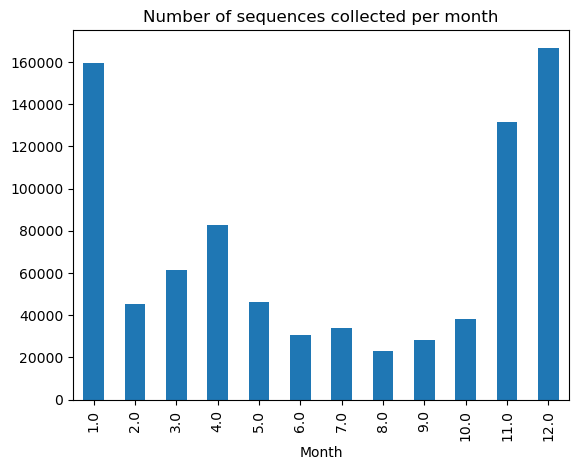

In [16]:
import matplotlib.pyplot as plt
metadata.groupby("Month").size().plot(kind='bar', x='Month', y='Count', title='Number of sequences collected per month')

## 3) Identifying Sequences to Download

Now, we'll analyze the sequences themselves rather than the metadata. To do that, we first need to find some sequences we want to analyze. Let's consider the following sequences:

In [20]:
# Find the reference sequence: the first COVID genome that was fully sequenced.
metadata[metadata["Sequence_Type"] == "RefSeq"]

,Nucleotide_Accession,Species_Taxonomy_Id,Species_Name,Virus_Genus,Virus_Family,Isolate_Name,Nucleotide_Length,Sequence_Type,Nuc_Completeness,Geo_Location,US_State,Host_Name,Host_Taxonomy_ID,Collection_Date,BioProject,BioSample,Continent,Month
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia,12.0


In [28]:
# Find One of the Delta sequences (one of the most common COVID variants)
metadata[metadata["Isolate_Name"].str.contains("Delta").fillna(False)]

C:\Users\Hassan\AppData\Local\Temp\ipykernel_31028\1847309177.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  metadata[metadata["Isolate_Name"].str.contains("Delta").fillna(False)]


,Nucleotide_Accession,Species_Taxonomy_Id,Species_Name,Virus_Genus,Virus_Family,Isolate_Name,Nucleotide_Length,Sequence_Type,Nuc_Completeness,Geo_Location,US_State,Host_Name,Host_Taxonomy_ID,Collection_Date,BioProject,BioSample,Continent,Month
85804,OM108163.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-3/2021,29860,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-14,NaN,NaN,Asia,8.0
85948,OM061695.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-1/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-10,NaN,NaN,Asia,8.0
251375,OK091006.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,"SARS-CoV-2/human/JPN/SARS-CoV-2, B.1.617.2 lin...",29836,GenBank,complete,Asia; Japan,NaN,NaN,9606,2021-08-24,NaN,NaN,Asia,8.0
665095,OM108132.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-2/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-11,NaN,NaN,Asia,8.0


In [29]:
# Find One of the Omicron sequences (another common COVID variants)
metadata[metadata["Isolate_Name"].str.contains("Omicron").fillna(False)]

C:\Users\Hassan\AppData\Local\Temp\ipykernel_31028\2367362463.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  metadata[metadata["Isolate_Name"].str.contains("Omicron").fillna(False)]


,Nucleotide_Accession,Species_Taxonomy_Id,Species_Name,Virus_Genus,Virus_Family,Isolate_Name,Nucleotide_Length,Sequence_Type,Nuc_Completeness,Geo_Location,US_State,Host_Name,Host_Taxonomy_ID,Collection_Date,BioProject,BioSample,Continent,Month
806923,OM095411.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Omicron-1/2021,29788,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-12-08,NaN,NaN,Asia,12.0


In [32]:
# Put all three sequences in a dictionary with the following keys: reference, base, delta, omicron.
sequences = {"reference": "NC_045512.2", "base": "OL467832.1", "delta": "OM061695.1", "omicron": "OM095411.1"}

In [34]:
selected_seqs = metadata[metadata["Nucleotide_Accession"].isin(sequences.values())]
selected_seqs

,Nucleotide_Accession,Species_Taxonomy_Id,Species_Name,Virus_Genus,Virus_Family,Isolate_Name,Nucleotide_Length,Sequence_Type,Nuc_Completeness,Geo_Location,US_State,Host_Name,Host_Taxonomy_ID,Collection_Date,BioProject,BioSample,Continent,Month
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia,12.0
85948,OM061695.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-1/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-10,NaN,NaN,Asia,8.0
254609,OL467832.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/hCoV_19_USA_ID_IVREF_6520...,29831,GenBank,complete,"North America; USA: Bingham, ID",NaN,NaN,9606,2020-01-01,NaN,NaN,North America,1.0
806923,OM095411.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Omicron-1/2021,29788,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-12-08,NaN,NaN,Asia,12.0


## 4) Downloading the Sequences

Next, let's download the actual nucleotide sequence for each of the selected COVID RNA sequences. We're going to use a Python library called Biopython that allows us, among many other things, to look up RNA and DNA sequences by their accession number and then download them.

In [48]:
# Import Biopython Modules 
from Bio import Entrez, SeqIO

# Define the email to use Entrez
Entrez.email = "hassanabdel999@gmail.com"

In [49]:
# Create a function that takes in a sequence ID (accession number) and returns the actual nucleotide sequence.
def download_seq(accession_id):
    """
    Download the sequence with the given accession ID from NCBI.
    """
    handle = Entrez.esearch(db="nucleotide", term=accession_id, retmax="1")
    record = Entrez.read(handle)
    handle = Entrez.efetch(db="nucleotide", id=record["IdList"][0], rettype="fasta", retmode="text")
    return handle.read()

In [46]:
# Apply this function to each of the sequences you identified earlier to create a sequence data dictionary.
sequences_data = {}
for seq in sequences.values():
    sequences_data[seq] = {"fasta": download_seq(seq)}

In [47]:
sequences_data

{'NC_045512.2': {'fasta': '>NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome\nATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA\nCGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAAC\nTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTG\nTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTC\nCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTAC\nGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGG\nCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGAT\nGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTC\nGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCT\nTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTA\nGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTG\nTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGG\nCCCTGATGGCT

## 5) Parsing RNA Sequences

Now, let's extract the actual genomic sequences from the dictionary we've just created and convert them from Fasta into a more readable format that we can easily work with to analyze the data. To do so, we're going to use a Fasta parser from Biopython.

In [52]:
import io 
# Add the sequence record to the dictionary
for k, v in sequences_data.items():
    v["seq_record"] = SeqIO.read(io.StringIO(v["fasta"]), "fasta")

In [54]:
# Print the sequence records
for seq in sequences_data.values():
    print(seq["seq_record"])

ID: NC_045512.2
Name: NC_045512.2
Description: NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')
ID: OL467832.1
Name: OL467832.1
Description: OL467832.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/USA/hCoV_19_USA_ID_IVREF_652092_2020/2020, complete genome
Number of features: 0
Seq('ACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATC...TAG')
ID: OM061695.1
Name: OM061695.1
Description: OM061695.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/CHN/Delta-1/2021, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...ACA')
ID: OM095411.1
Name: OM095411.1
Description: OM095411.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/CHN/Omicron-1/2021, complete genome
Number of features: 0
Seq('CAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAA

## 6) Aligning RNA Sequences

Now that we've fetched the actual COVID nucleotide sequences in a readable format, let's try to align them in relation to the number and succession of nucleotides to determine how the virus has mutated over time.

We need to determine which parts of two selected RNA sequences align and which don't. In other words, we need to determine the difference between the sequences. For this purpose, we're going to use an alignment algorithm from Biopython, calculate the alignment score between the sequences, and draw conclusions about the difference between them.



In [ ]:
from Bio import Align 

# Create a pairwise aligner class
aligner = Align.PairwiseAligner()

In [61]:
# Find the alignment score between the reference sequence and any other sequence from the dictionary (base).
score = aligner.score(sequences_data[sequences["reference"]]["seq_record"].seq, sequences_data[sequences["base"]]["seq_record"].seq)
score

29820.0

In [62]:
score / len(sequences_data[sequences["reference"]]["seq_record"].seq)

0.9972243587599906

The base variant didn't mutate a lot when compared with the reference variant. 

## 7) Checking Alignment Across Variants

Next, we can look at this score between all of the sequences from our dictionary. In other words, we need to compare the sequences pairwise in terms of their alignment scores and extract insights from those numbers.

In [63]:
import numpy as np

# Create a matrix to store the alignment scores
alignment_scores = np.zeros((len(sequences), len(sequences)))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [68]:
# Compare the sequences pairwise, iterating through the sequence list twice, calculate the alignment score for each pair, and put the result into the comparison matrix.
for i, seq1 in enumerate(sequences.values()):
    for j, seq2 in enumerate(sequences.values()):
        alignment_scores[i, j] = aligner.score(sequences_data[seq1]["seq_record"].seq, sequences_data[seq2]["seq_record"].seq)

In [69]:
alignment_scores

array([[29903., 29820., 29818., 29725.],
       [29820., 29831., 29775., 29722.],
       [29818., 29775., 29858., 29688.],
       [29725., 29722., 29688., 29788.]])

In [71]:
# Turn the matrix into a pandas DataFrame with meaningful column names and the index
comparison_df = pd.DataFrame(alignment_scores, columns=sequences.keys(), index=sequences.keys())
comparison_df

,reference,base,delta,omicron
reference,29903.0,29820.0,29818.0,29725.0
base,29820.0,29831.0,29775.0,29722.0
delta,29818.0,29775.0,29858.0,29688.0
omicron,29725.0,29722.0,29688.0,29788.0


In [81]:
for i in range(len(comparison_df)):
    comparison_df.iloc[:, i] = comparison_df.iloc[:, i] / comparison_df.iloc[:, i][i]
comparison_df

C:\Users\Hassan\AppData\Local\Temp\ipykernel_31028\1198202202.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  comparison_df.iloc[:, i] = comparison_df.iloc[:, i] / comparison_df.iloc[:, i][i]


,reference,base,delta,omicron
reference,1.000000,0.999631,0.998660,0.997885
base,0.997224,1.000000,0.997220,0.997784
delta,0.997157,0.998123,1.000000,0.996643
omicron,0.994047,0.996346,0.994306,1.000000


From the alignment score we can conclude that there is low mutation rate between all these 4 variants of the COVID virus. 